### Bibliotecas

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

### Fórmula - Método das diferenças finitas

### Função

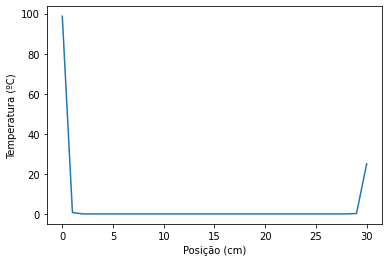

0.0049399573704287094


In [32]:
# parâmetros:

# p - densidade do material
# cp - calor específico
# k - condutividade térmica
# h - coeficiente de transferência por convecção
# Tf - temperatura do fluido
# Tb - temperatura da base
# r - raio
# L - comprimento
# dx - delta X
# tt - tempo total
def CTA(p, cp, k, h, Tf, Tb, r, L, dx, tt):
    perimetro = 2*math.pi*r
    atr = math.pi*(r**2)
    c = (h*perimetro)/(k*atr)
    alpha = k/(p*cp)
    
    tol = 1*10e-10
    
    # Delta T
    delta_t = (dx**2/(alpha*(c*dx**2)+2))*0.99
    
    # Constante
    cte = alpha*delta_t
    
    # Número de passos no tempo
    passos = int(tt/delta_t)
    
    # Número de nós
    num_nos = int(L/dx) + 1
    
    # Iniciando a matriz com zeros
    T = np.zeros((passos, num_nos))
    
    # Condições de contorno
    T[:, L] = 25
    T[:, 0] = Tb
    erro = 0
    for l in range(0, passos-1):
        lista = []
        for i in range(0, num_nos-1):
            T[l+1, i] = T[l, i] + (cte/(dx**2))*(T[l, i+1] - 2*T[l, i] + T[l, i-1]) - (cte*c*(T[l, i] - Tf))
            
            erro = (T[l+1, i] - T[l, i])/T[l+1, i]
            
            lista.append(erro)
        
        if (max(lista) < tol):
            erro = max(lista)
            break
                
    
    T = np.array(T[passos-1, :])
    x = np.linspace(0, L, num_nos)
    
    plt.plot(x, T)
    plt.xlabel("Posição (cm)")
    plt.ylabel("Temperatura (ºC)")
    plt.show()
    
    return erro
    
    
erro = CTA(2700, 896, 180, 50, 50, 100, 5, 30, 1, 100)
print(erro)